# Neste notebook estarei buscando responder:

Quantos contratos foram assinados por mês a cada ano?

Qual o valor médio de contrato por ano?

Há alguma tendência (mais contratos em certos períodos)?

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
sns.set(style = 'whitegrid')

In [80]:
ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

In [81]:
# Convertendo 'data_de_assinatura' novamente pois o arquivo CSV não preserva o tipo 'datetime' de forma direta

df['data_de_assinatura'] = pd.to_datetime(df['data_de_assinatura'])

In [82]:
df['ano_mes'] = df['data_de_assinatura'].dt.to_period('M')

In [83]:
contratos_por_ano_mes = df['ano_mes'].value_counts().sort_index()

In [84]:
# Não me agradou, decidi fazer um por ano.
# plt.figure(figsize=(20, 6))
# contratos_por_ano_mes.plot(kind='bar', color='skyblue')
# plt.title("Número de Contratos Assinados por Ano/Mês", fontsize=16)
# plt.xlabel("Ano/Mês")
# plt.ylabel("Número de Contratos")
# plt.xticks(rotation=45)
# plt.show()

In [85]:
df['ano'] = df['data_de_assinatura'].dt.year
df['mes'] = df['data_de_assinatura'].dt.month

contratos_por_ano = df['ano'].value_counts().sort_index()
# print(contratos_por_ano)

In [ ]:
# Exemplo de código para criar um grafico de colunas com os rótulos:

# grafico = sns.barplot(x = contratos_por_ano.index, y = contratos_por_ano.values, palette = 'crest', hue = contratos_por_ano, legend = False, orient = 'v')

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_height():,.0f}', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(0, 5), textcoords = 'offset points')

# Exemplo de código para criar um grafico de barras com os rótulos:

# grafico = sns.barplot(y=contratos_por_ano.index, x=contratos_por_ano.values, palette='crest', hue=contratos_por_ano, legend=False, orient='h')

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_width():,.0f}', 
#                      (p.get_width(), p.get_y() + p.get_height() / 2), 
#                      ha = 'left', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(5, 0), textcoords = 'offset points')

### Quantos contratos foram assinados por ano? 

Aqui estamos analisando o **número de contratos assinados por ano**.

O gráfico a seguir exibe o número de contratos assinados por **ano**.

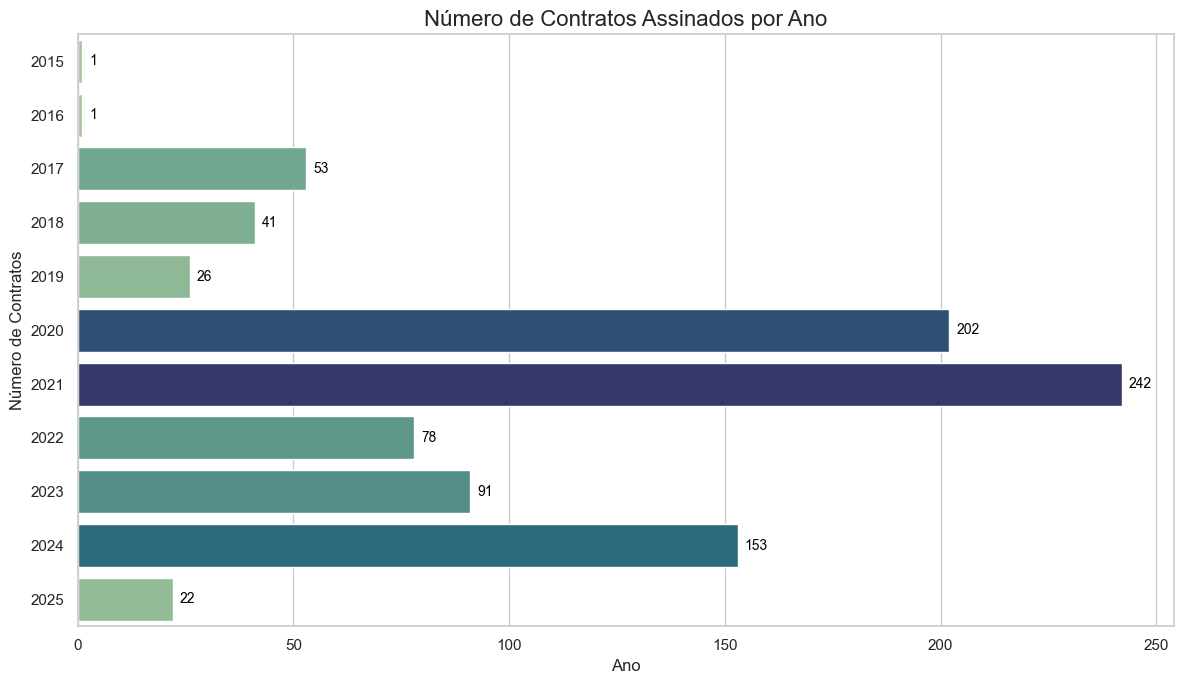

In [95]:
plt.figure(figsize=(12, 7))

grafico = sns.barplot(y=contratos_por_ano.index, x=contratos_por_ano.values, palette='crest', hue=contratos_por_ano, legend=False, orient='h')

for p in grafico.patches:
    grafico.annotate(f'{p.get_width():,.0f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha = 'left', va = 'center', 
                     fontsize = 10, color = 'black', 
                     xytext=(5, 0), textcoords = 'offset points')
    
plt.title('Número de Contratos Assinados por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número de Contratos')
plt.tight_layout() 
plt.show()

### Quantos contratos foram assinados por mês em cada ano? 

Aqui estamos analisando o **número de contratos assinados por mês**.

A sequência de gráficos a seguir exibe o número de contratos assinados por **mês** para cada **ano** na base de dados.

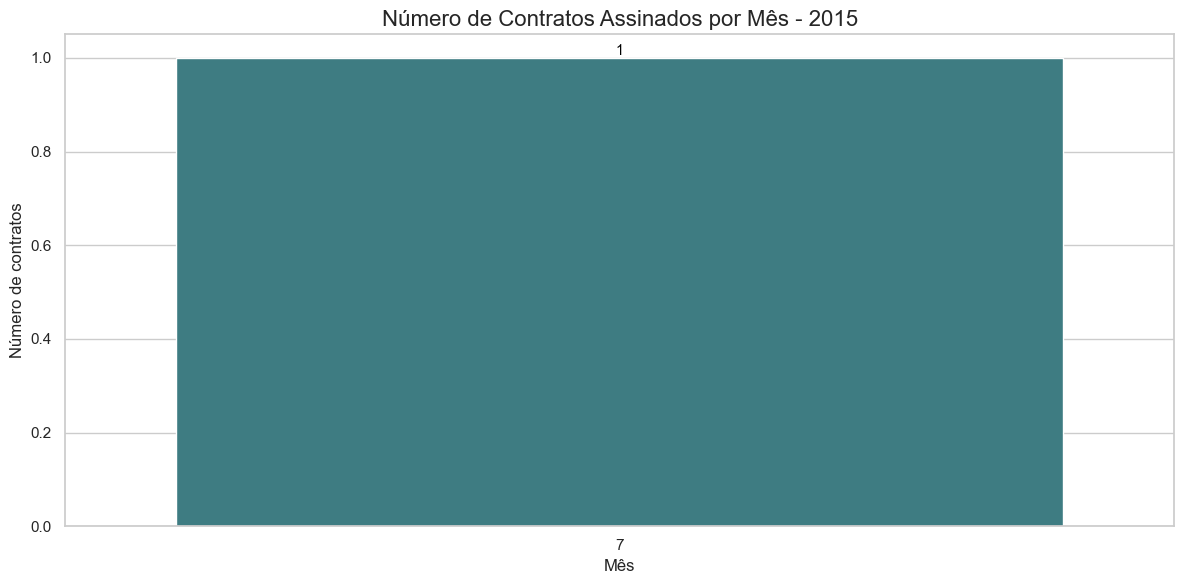

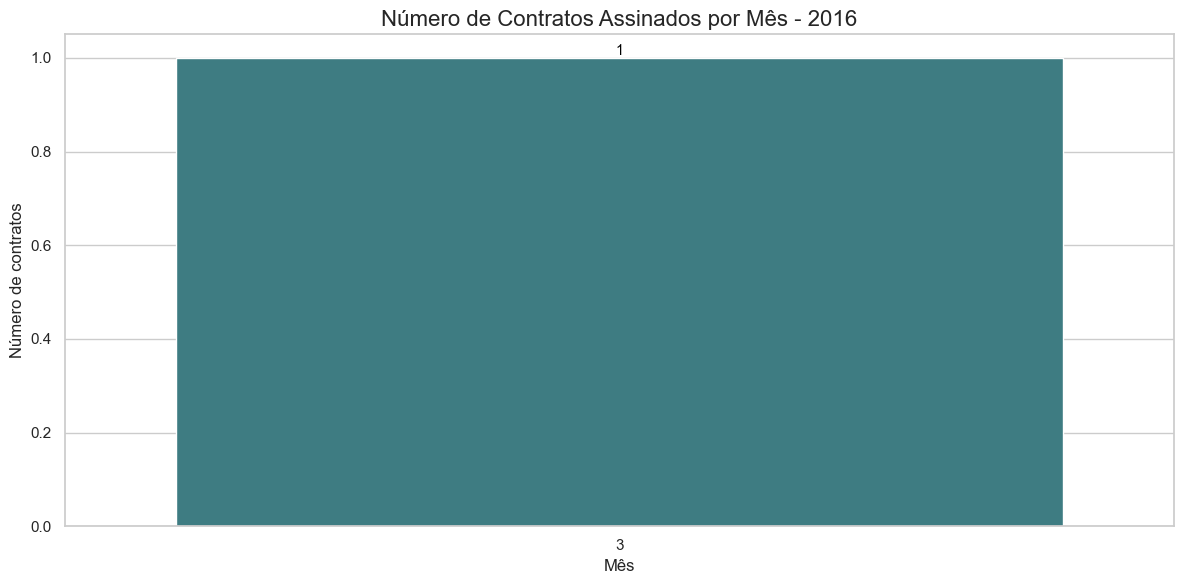

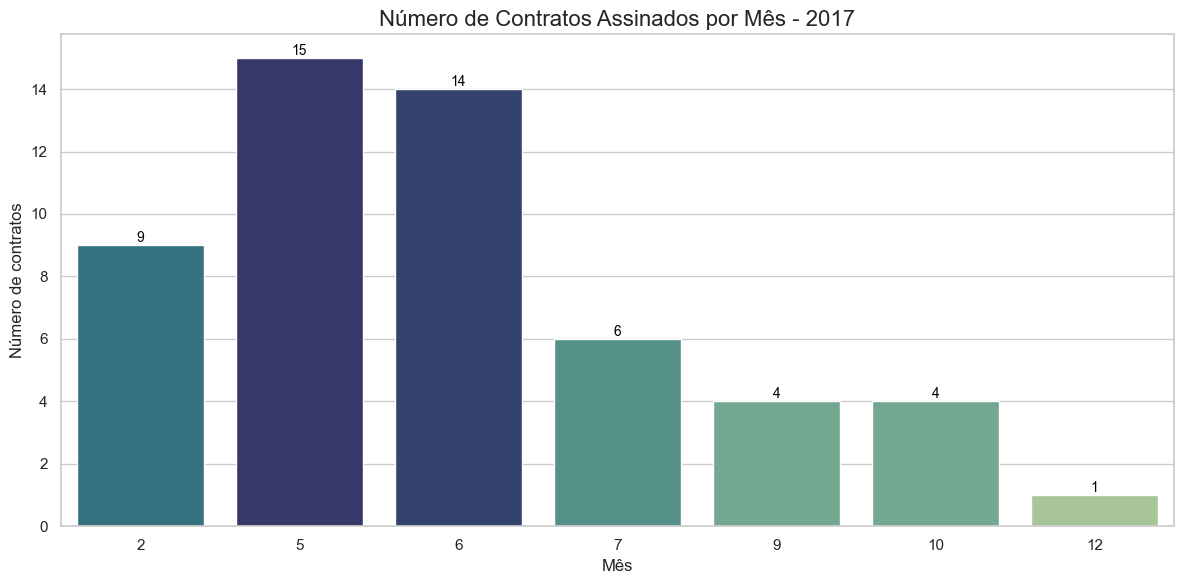

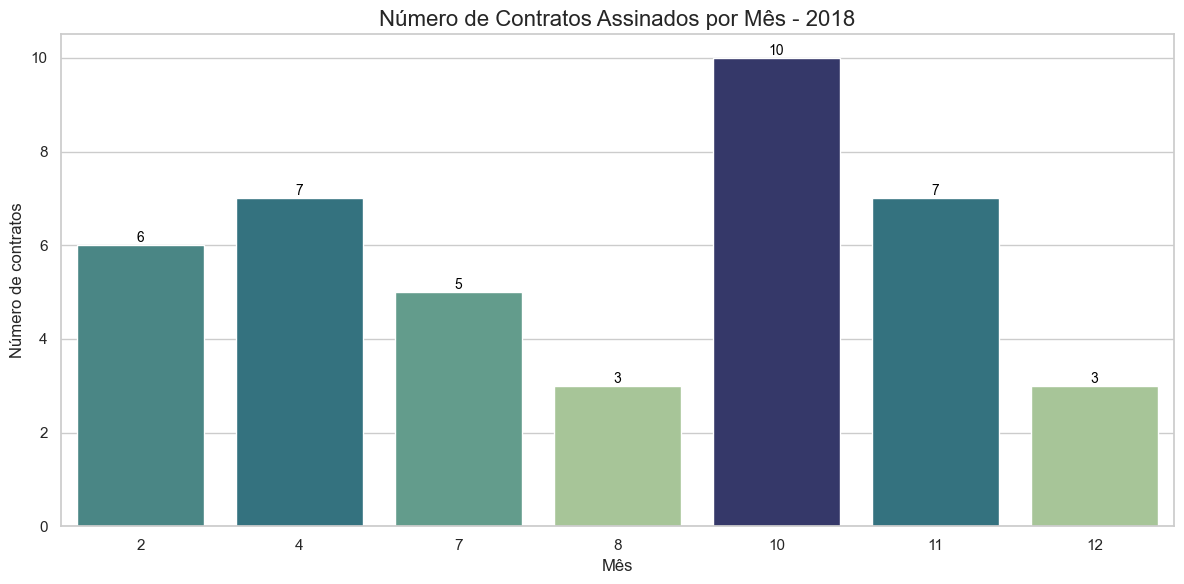

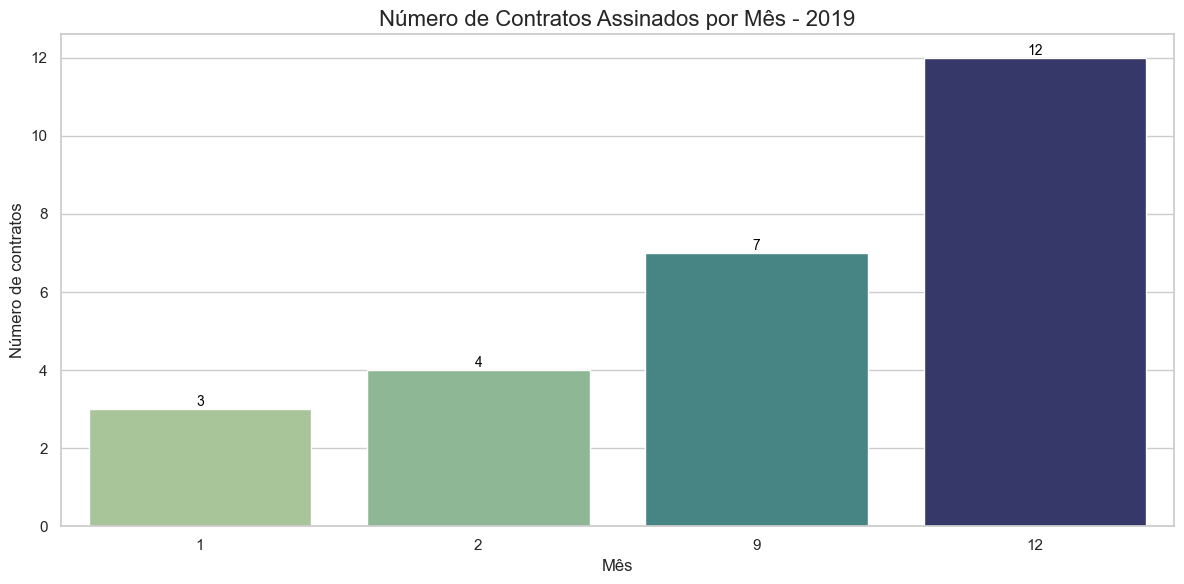

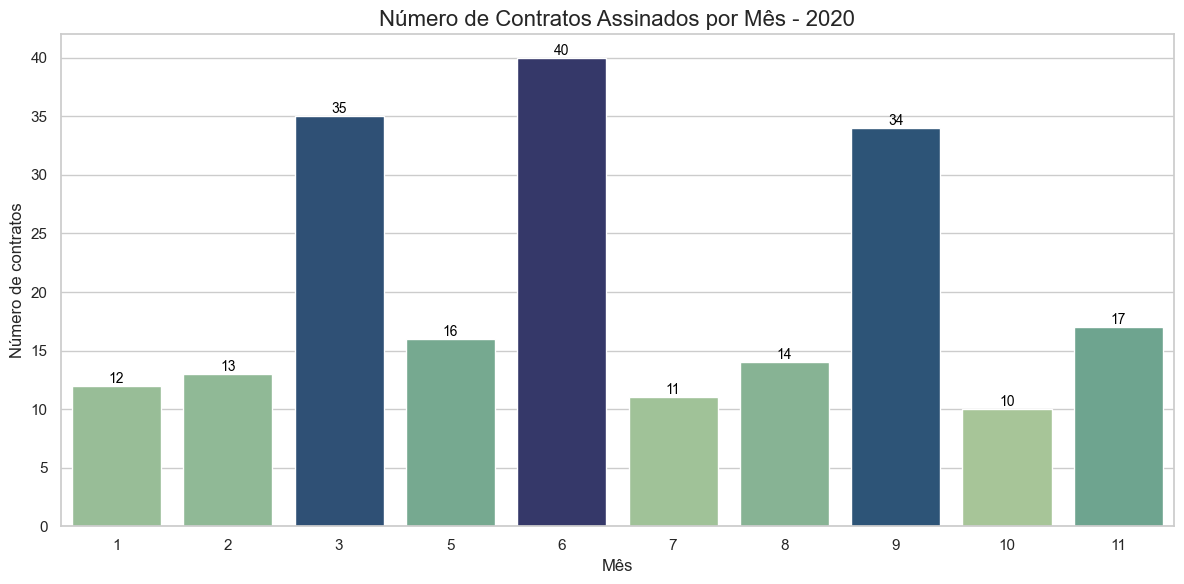

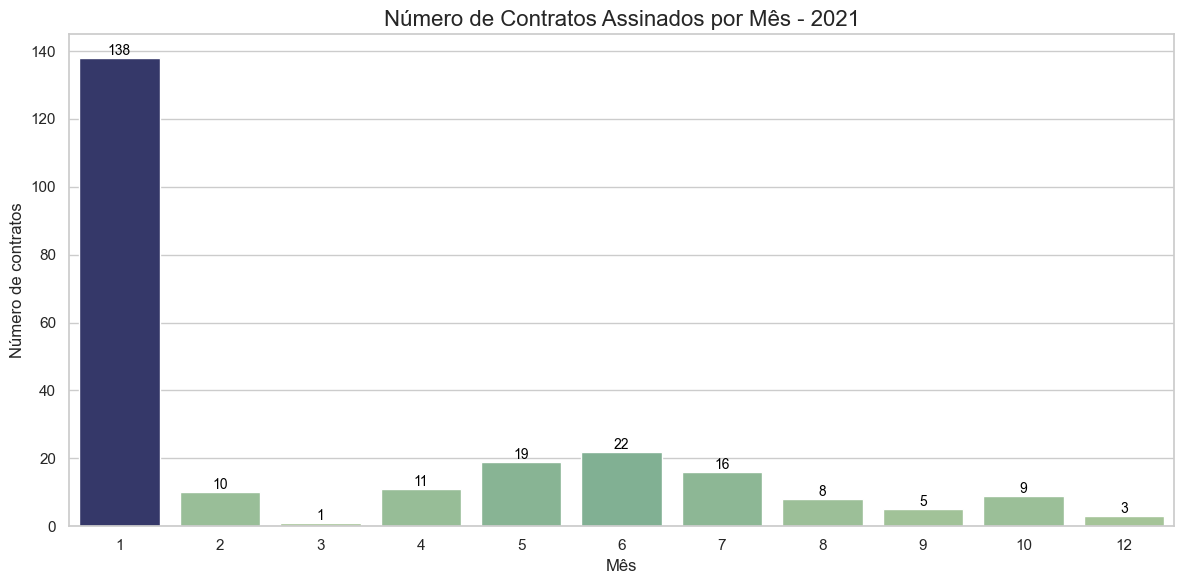

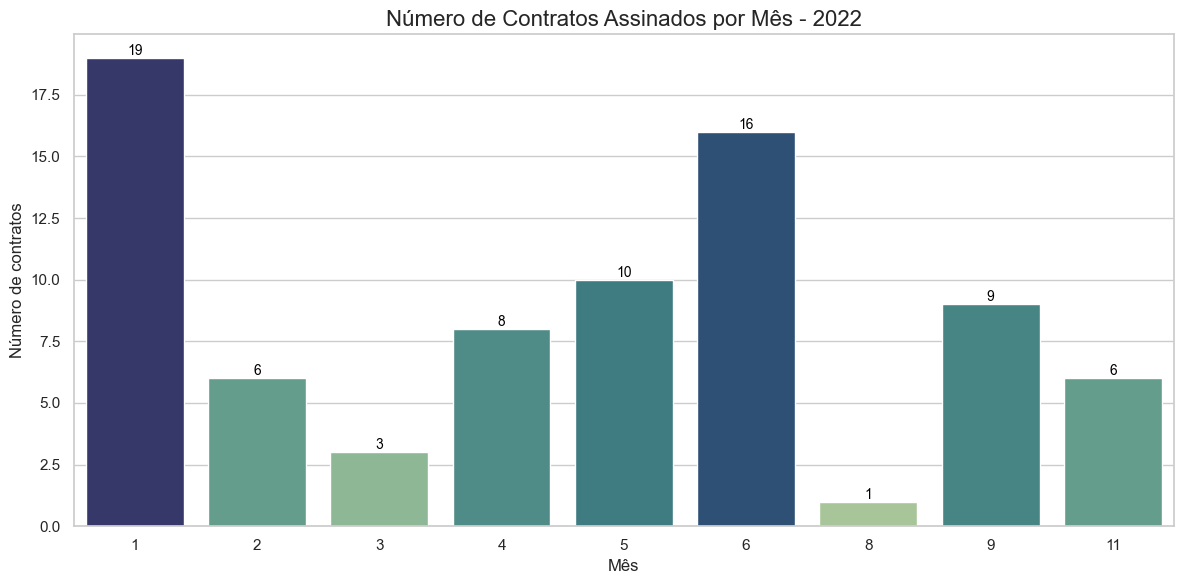

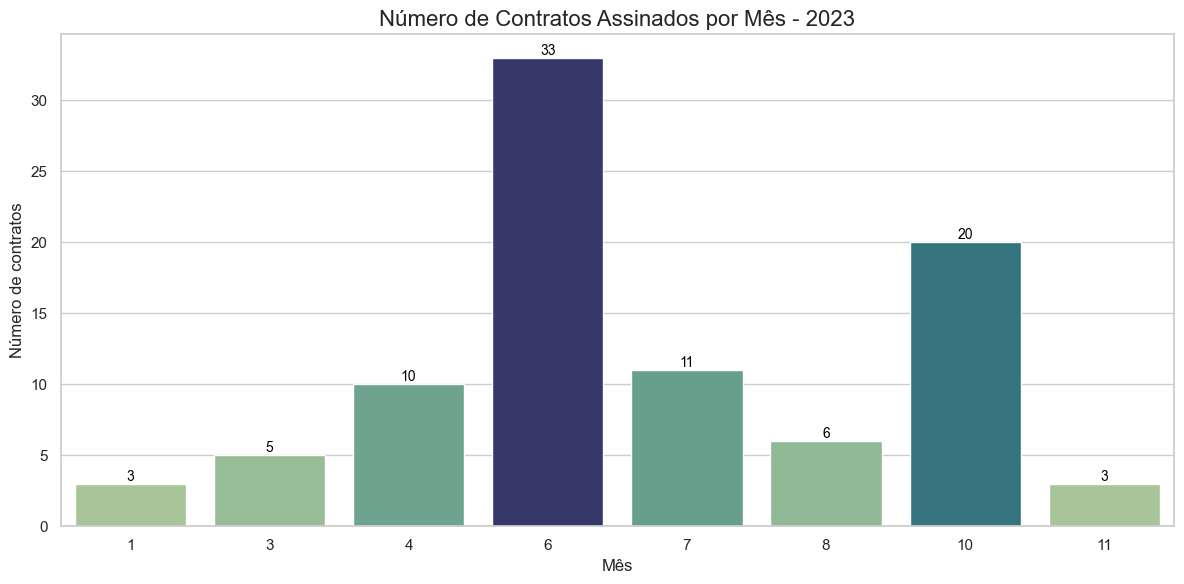

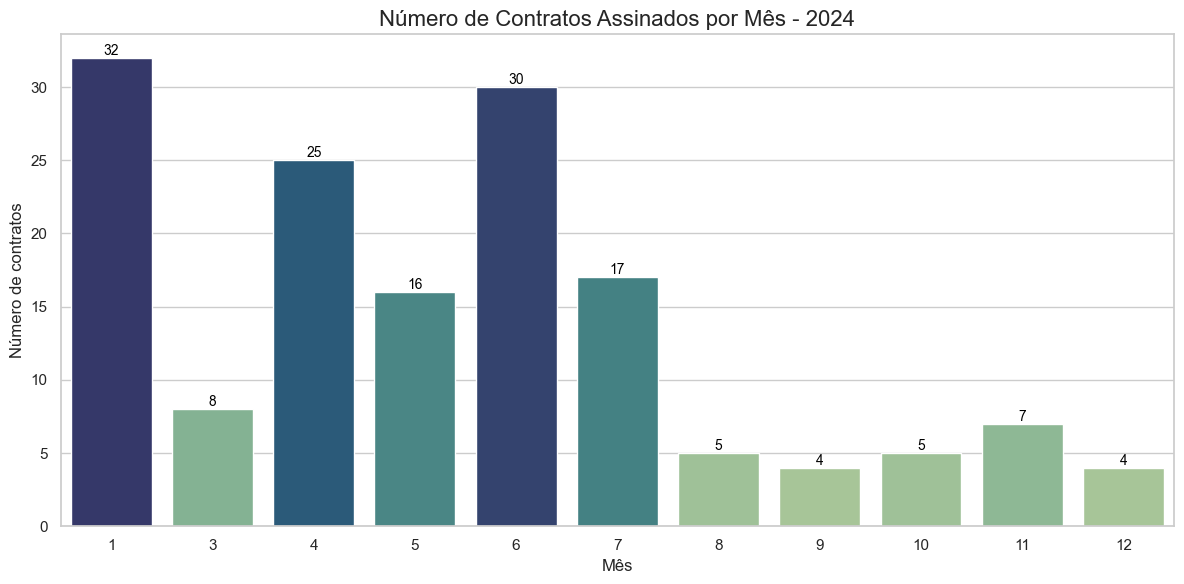

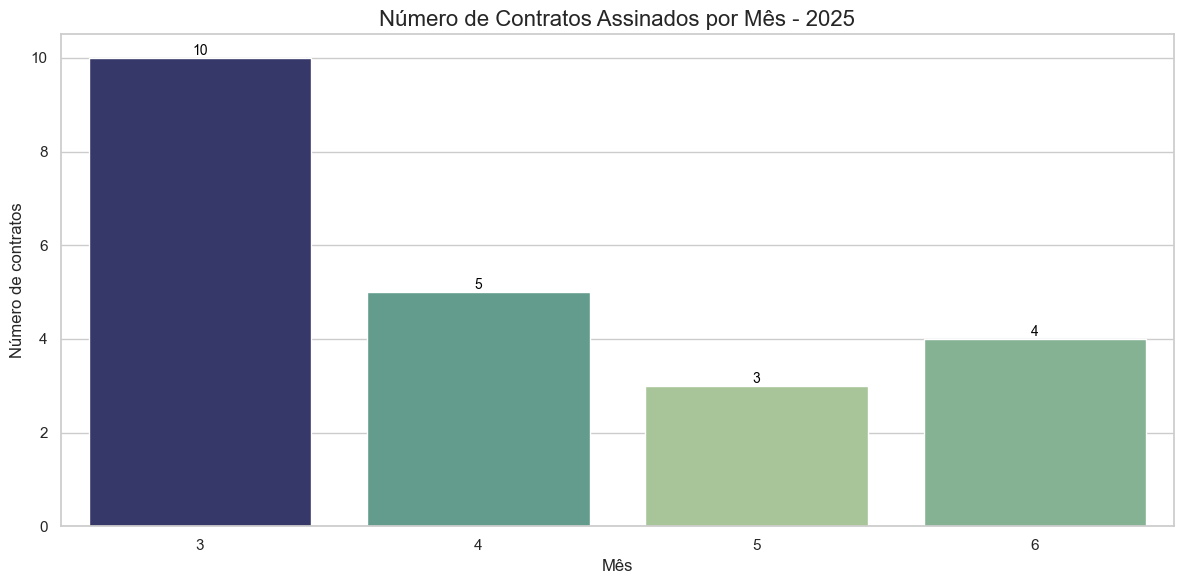

In [96]:
anos = sorted(df['data_de_assinatura'].dt.year.unique())

contratos_por_mes_por_ano = {}

for ano in anos:
    df_ano = df[df['data_de_assinatura'].dt.year == ano]
    
    df_ano.loc[:, 'mes'] = df_ano['data_de_assinatura'].dt.month
    
    contratos_por_mes_por_ano[ano] = df_ano['mes'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    grafico = sns.barplot(x=contratos_por_mes_por_ano[ano].index, y=contratos_por_mes_por_ano[ano].values, palette='crest', hue = contratos_por_mes_por_ano[ano], legend = False)

    for p in grafico.patches:
        grafico.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     fontsize = 10, color = 'black', 
                     xytext=(0, 5), textcoords = 'offset points')


    plt.title(f'Número de Contratos Assinados por Mês - {ano}', fontsize=16)
    plt.ylabel('Número de contratos', fontsize=12)
    plt.xlabel('Mês', fontsize=12)

    plt.tight_layout()
    plt.show()